In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df=pd.read_csv('twitchdata.csv')
df

,Channel,Watch_time_minutes,Stream_time_minutes,Peak_viewers,Average_viewers,Followers,Followers_gained,Views_gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish
996,ë¹…í—¤ë“œ (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean
997,ë§ˆìŠ¤ì¹´ (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English


In [7]:
partnered_options = len(pd.unique(df['Partnered']))
print(partnered_options)

2


In [8]:
df = pd.get_dummies(df, columns=['Partnered'])
df.head()

,Channel,Watch_time_minutes,Stream_time_minutes,Peak_viewers,Average_viewers,Followers,Followers_gained,Views_gained,Mature,Language,Partnered_False,Partnered_True
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,False,English,0,1
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,False,English,0,1
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,Portuguese,0,1
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,False,English,0,1
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,False,English,0,1


In [15]:
df = pd.get_dummies(df, columns=['Mature'])
df.head()

,Channel,Watch_time_minutes,Stream_time_minutes,Peak_viewers,Average_viewers,Followers,Followers_gained,Views_gained,Language,Partnered_False,Partnered_True,Mature_False,Mature_True
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,English,0,1,1,0
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,English,0,1,1,0
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,Portuguese,0,1,0,1
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,English,0,1,1,0
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,English,0,1,1,0


In [17]:
df.rename(columns={'Partnered_False': 'not_partnered', 'Partnered_True': 'partnered', 
                   'Mature_False': 'not_mature', 'Mature_True': 'mature'}, inplace = True)
df.head()

,Channel,Watch_time_minutes,Stream_time_minutes,Peak_viewers,Average_viewers,Followers,Followers_gained,Views_gained,Language,not_partnered,partnered,not_mature,mature
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,English,0,1,1,0
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,English,0,1,1,0
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,Portuguese,0,1,0,1
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,English,0,1,1,0
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,English,0,1,1,0


In [14]:
Total = df['Partnered_False'].sum()
print(Total)

22


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Channel              1000 non-null   object
 1   Watch_time_minutes   1000 non-null   int64 
 2   Stream_time_minutes  1000 non-null   int64 
 3   Peak_viewers         1000 non-null   int64 
 4   Average_viewers      1000 non-null   int64 
 5   Followers            1000 non-null   int64 
 6   Followers_gained     1000 non-null   int64 
 7   Views_gained         1000 non-null   int64 
 8   Partnered            1000 non-null   bool  
 9   Mature               1000 non-null   bool  
 10  Language             1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


In [18]:
df.describe().round(2)

,Watch_time_minutes,Stream_time_minutes,Peak_viewers,Average_viewers,Followers,Followers_gained,Views_gained,not_partnered,partnered,not_mature,mature
count,1.000000e+03,1000.00,1000.00,1000.00,1000.00,1000.00,1.000000e+03,1000.00,1000.00,1000.00,1000.00
mean,4.184279e+08,120515.16,37065.05,4781.04,570054.07,205518.53,1.166817e+07,0.02,0.98,0.77,0.23
std,5.496355e+08,85376.20,60314.31,8453.68,804413.37,339913.71,2.490572e+07,0.15,0.15,0.42,0.42
min,1.221928e+08,3465.00,496.00,235.00,3660.00,-15772.00,1.757880e+05,0.00,0.00,0.00,0.00
25%,1.631899e+08,73758.75,9113.75,1457.75,170546.25,43758.25,3.880602e+06,0.00,1.00,1.00,0.00
50%,2.349908e+08,108240.00,16676.00,2425.00,318063.00,98352.00,6.456324e+06,0.00,1.00,1.00,0.00
75%,4.337399e+08,141843.75,37569.75,4786.25,624332.25,236130.75,1.219676e+07,0.00,1.00,1.00,0.00
max,6.196162e+09,521445.00,639375.00,147643.00,8938903.00,3966525.00,6.701375e+08,1.00,1.00,1.00,1.00


In [26]:
df.corr().round(3)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_9868\352886112.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().round(3)


,Watch_time_minutes,Stream_time_minutes,Peak_viewers,Average_viewers,Followers,Followers_gained,Views_gained,Partnered,Mature
Watch_time_minutes,1.000,0.151,0.583,0.476,0.620,0.515,0.530,0.038,-0.043
Stream_time_minutes,0.151,1.000,-0.120,-0.249,-0.091,-0.158,0.064,-0.007,0.045
Peak_viewers,0.583,-0.120,1.000,0.683,0.533,0.470,0.298,0.028,-0.083
Average_viewers,0.476,-0.249,0.683,1.000,0.428,0.420,0.250,-0.009,-0.082
Followers,0.620,-0.091,0.533,0.428,1.000,0.716,0.276,0.044,-0.089
Followers_gained,0.515,-0.158,0.470,0.420,0.716,1.000,0.244,0.027,-0.093
Views_gained,0.530,0.064,0.298,0.250,0.276,0.244,1.000,-0.035,-0.088
Partnered,0.038,-0.007,0.028,-0.009,0.044,0.027,-0.035,1.000,0.001
Mature,-0.043,0.045,-0.083,-0.082,-0.089,-0.093,-0.088,0.001,1.000


In [27]:
stats.pearsonr(df.Followers, df.Watch_time_minutes)  # corr and p-value

PearsonRResult(statistic=0.6202338834217136, pvalue=2.3274833035256863e-107)

In [42]:
stats.pearsonr(df.Followers, df.Followers_gained) 

PearsonRResult(statistic=0.7156184583458499, pvalue=1.0469037954814497e-157)

In [30]:
stats.pearsonr(df.Followers, df.Partnered) 

PearsonRResult(statistic=0.044418107738293265, pvalue=0.16044995537209572)

In [34]:
stats.pearsonr(df.Followers, df.Peak_viewers) 

PearsonRResult(statistic=0.532529315505119, pvalue=2.519155304293745e-74)

In [30]:
import statsmodels.formula.api as sm

m = sm.ols('Average_viewers ~ Watch_time_minutes + Stream_time_minutes + Peak_viewers + mature + partnered', df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Average_viewers   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     213.6
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.05e-154
Time:                        11:38:22   Log-Likelihood:                -10096.
No. Observations:                1000   AIC:                         2.020e+04
Df Residuals:                     994   BIC:                         2.023e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5202.0983   1292.402      4.025      0.000    2665.949    7738.248
Watch_time_minutes   2.932e-06   4.33e-07      6.763      0.000    2.08e-06    3.78e-06
Stream_time_minutes    -0.0210      0.002     -9.193      0.000      -0.025      -0.017
Peak_viewers            0.0765      0.004     19.414      0.000       0.069       0.084
mature               -375.3457    443.988     -0.845      0.398   -1246.607     495.916
partnered           -1906.3526   1269.667     -1.501      0.134   -4397.888     585.183
==============================================================================
Omnibus:                     1519.304   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           931936.614
Skew:                           8.636   Prob(JB):                         0.00
Kurtosis:                     151.554   Cond. No.                     6.65e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Average Viewers vs. Watch Time')

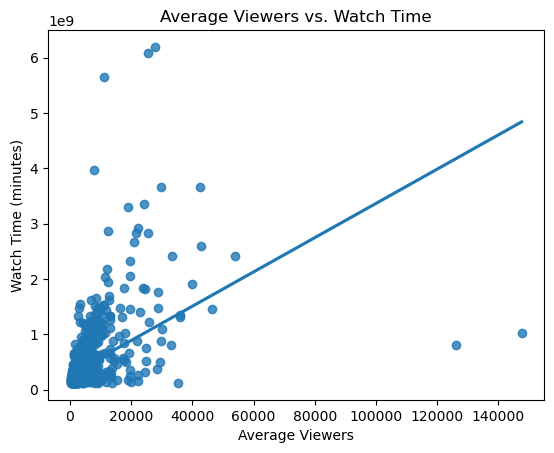

In [23]:
sns.regplot(x=df['Average_viewers'], y=df['Watch_time_minutes'], ci=None)
plt.xlabel("Average Viewers")
plt.ylabel("Watch Time (minutes)")
plt.title('Average Viewers vs. Watch Time')

Text(0.5, 1.0, 'Average Viewers vs.Stream Time')

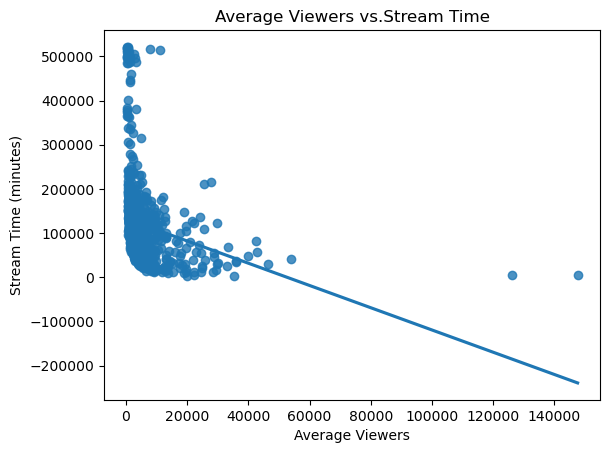

In [24]:
sns.regplot(x=df['Average_viewers'], y=df['Stream_time_minutes'], ci=None)
plt.xlabel("Average Viewers")
plt.ylabel("Stream Time (minutes)")
plt.title('Average Viewers vs.Stream Time')

Text(0.5, 1.0, 'Average Viewers vs.Followers Gained')

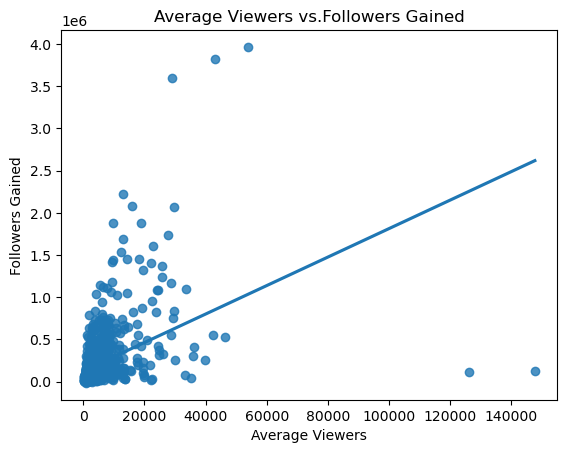

In [25]:
sns.regplot(x=df['Average_viewers'], y=df['Followers_gained'], ci=None)
plt.xlabel("Average Viewers")
plt.ylabel("Followers Gained")
plt.title('Average Viewers vs.Followers Gained')

Text(0.5, 1.0, 'Average Viewers vs. Peak Viewers')

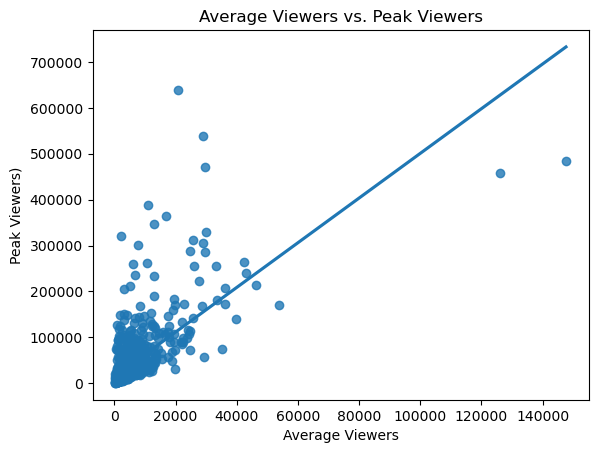

In [26]:
sns.regplot(x=df['Average_viewers'], y=df['Peak_viewers'], ci=None)
plt.xlabel("Average Viewers")
plt.ylabel("Peak Viewers)")
plt.title('Average Viewers vs. Peak Viewers')

Text(0.5, 1.0, 'Average Viewers vs. Followers')

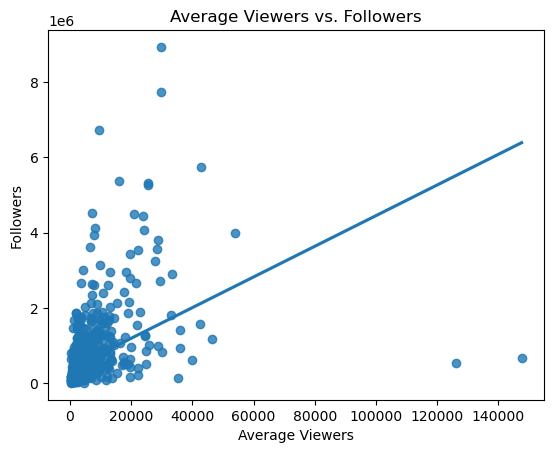

In [27]:
sns.regplot(x=df['Average_viewers'], y=df['Followers'], ci=None)
plt.xlabel("Average Viewers")
plt.ylabel("Followers")
plt.title('Average Viewers vs. Followers')

Text(0.5, 1.0, 'Average Viewers vs. Partnered')

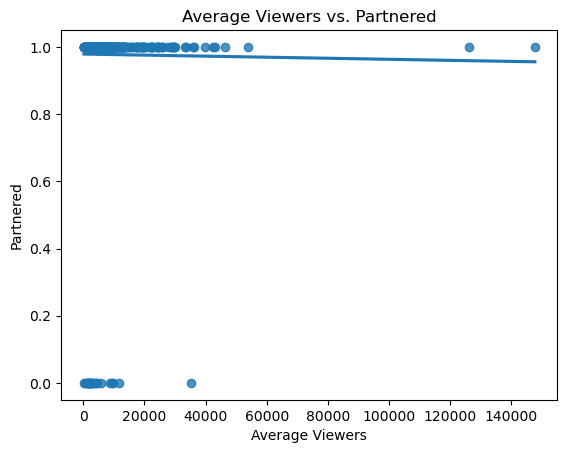

In [28]:
sns.regplot(x=df['Average_viewers'], y=df['partnered'], ci=None)
plt.xlabel("Average Viewers")
plt.ylabel("Partnered")
plt.title('Average Viewers vs. Partnered')

Text(0.5, 1.0, 'Average Viewers vs. Mature')

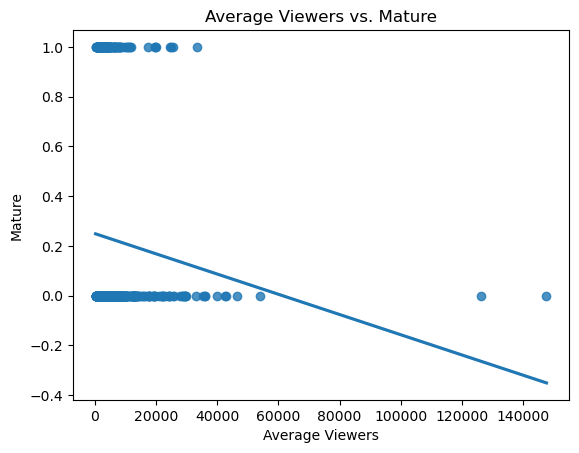

In [29]:
sns.regplot(x=df['Average_viewers'], y=df['mature'], ci=None)
plt.xlabel("Average Viewers")
plt.ylabel("Mature")
plt.title('Average Viewers vs. Mature')

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


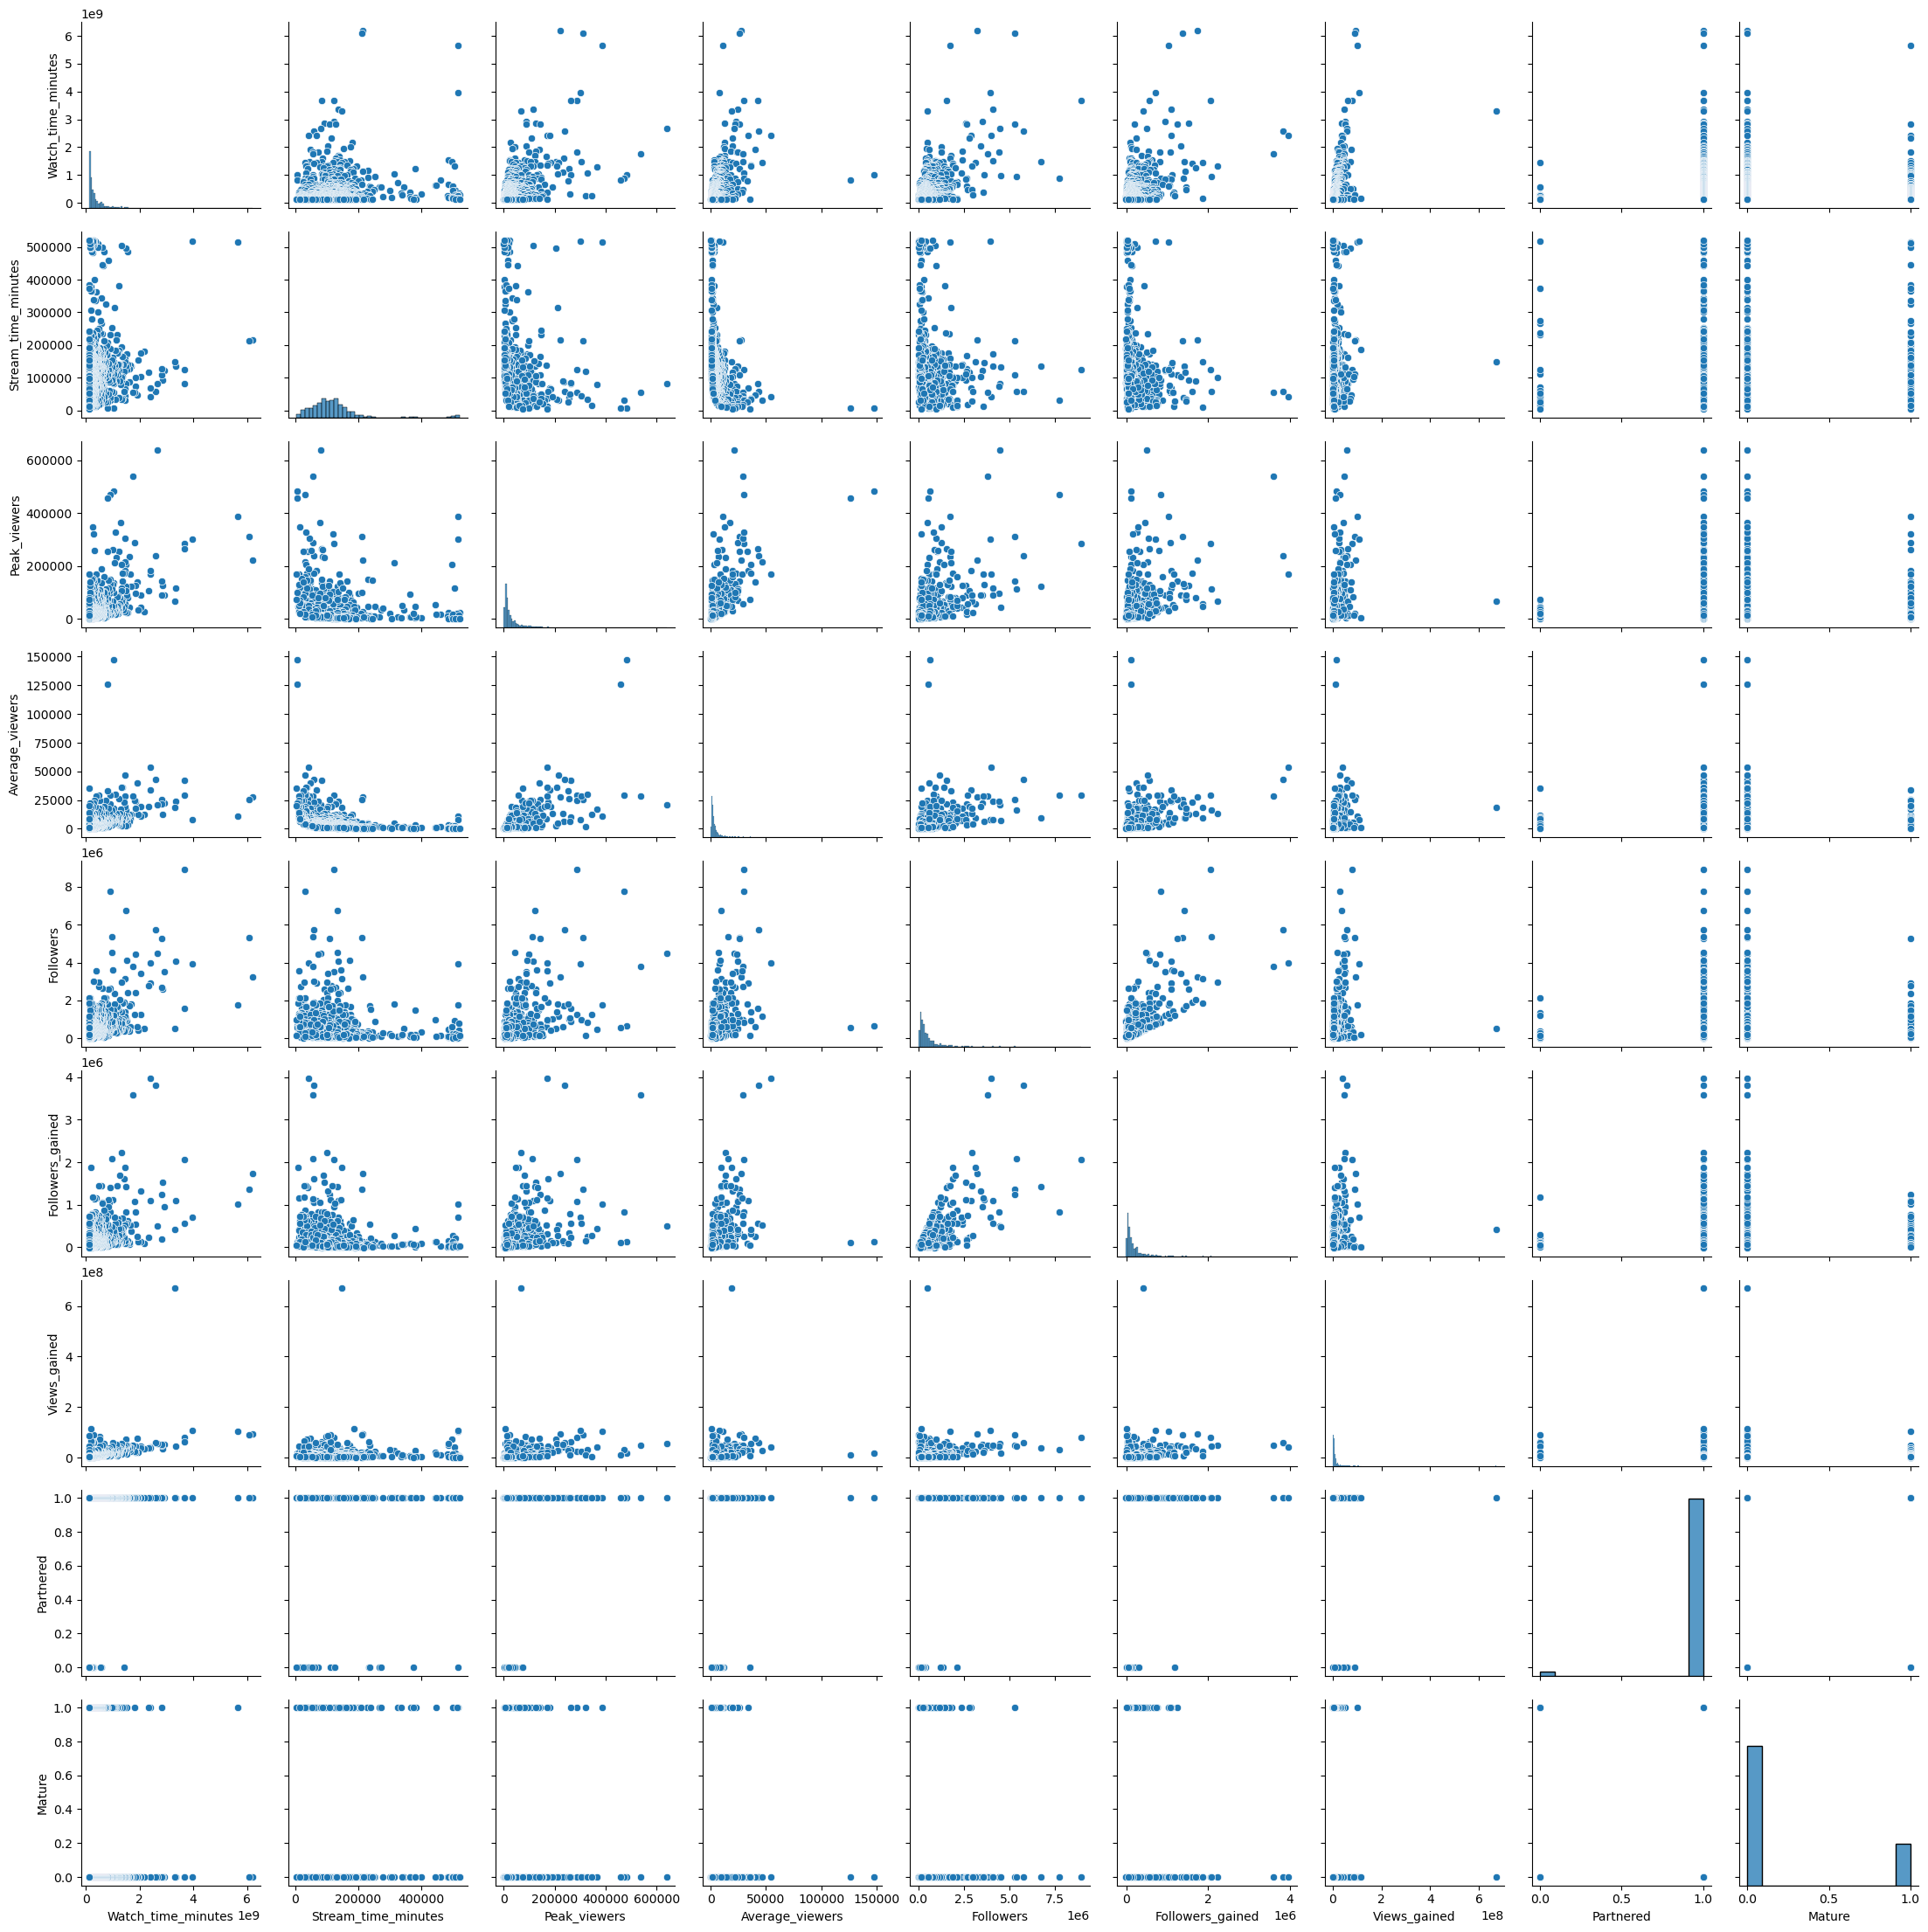

In [40]:
sns.pairplot(df)
plt.show()